This script generates plots in Figure 2 and S2

In [2]:
!pip3 install scanpy

# enable using R
%load_ext rpy2.ipython

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# packages
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=d28da0d6f1bf4f55d0413de5aa26be59f380fade95b4027698fa585cbe4dc773
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=ed881edafdc7d256b05dafbe367ae15b0c1e9d9ffcee9a0dac2982675a2ce487
  Stored in directory: /root/.cache/pip/wheels/6a/a

In [3]:
%%R
install.packages('reshape2')
install.packages('viridis')

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpIGWRB0/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpIGWRB0/downloaded_packages’



In [4]:
# check the files
os.listdir('drive/MyDrive/Documents/manuscripts/xgboost_paper/UMAPs')
train_dir = "drive/MyDrive/Documents/manuscripts/xgboost_paper/UMAPs/"

In [5]:
# load the h5ad files
adata_Tube1 = sc.read(train_dir + 'tube1_training_umap.h5ad')
adata_Tube2 = sc.read(train_dir +'tube2_training_umap.h5ad')
adata_Tube3 = sc.read(train_dir +'tube3_training_umap.h5ad')

### Figure 2A

In [6]:
tube = "tube1"
if tube == "tube1":
    channels = ["CD7", "CD56", "CD34", "CD117", "CD33", "CD38", "HLA.DR",
                             "CD13", "CD45", "CD133", "CD2",'SSC.A']
if tube == "tube2":
    channels = ["CD34", "CD117", "CD33", "CD38", "HLA.DR",
                             "CD13", "CD45", "CD19", "CD22", "CD15", "CD10", "SSC.A"]
if tube == "tube3":
    channels = ["CD34", "CD117", "CD33", "CD14", "HLA.DR", "CD11b",
                              "CD13", "CD45", "CD64", "CD36", "CD4", "CD123", "SSC.A"]

In [7]:
adata_Tube1

AnnData object with n_obs × n_vars = 550000 × 12
    obs: 'Class', 'Label', 'Blast.Type', 'New.Category'
    uns: 'New.Category_colors', 'neighbors', 'umap'
    obsm: 'X_umap', 'transformed'
    obsp: 'connectivities', 'distances'

In [8]:
#Subset the normals
adata_Tube1_N = adata_Tube1[adata_Tube1.obs['Class'].isin([
    'Normal'])]


sc.pp.subsample(adata_Tube1_N, n_obs = 20000, random_state = 23 )

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


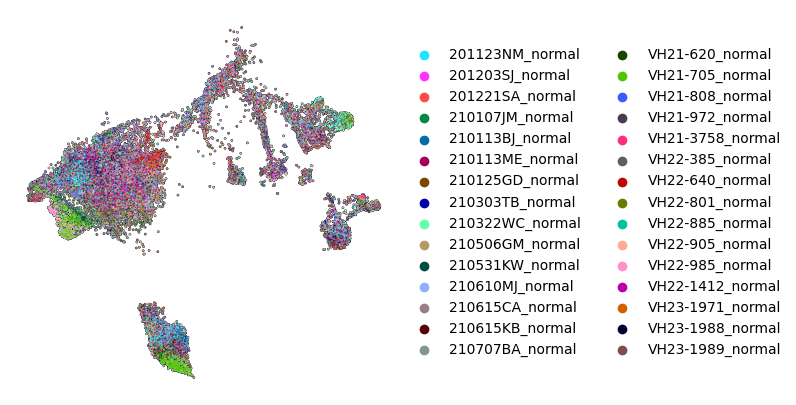

In [9]:
rcParams['figure.figsize'] = 5, 5
Color103=[  "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
            #"#FFDBE5",
            "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
            "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
            "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
            "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
            "#372101", "#FFB500", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
            "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
            "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
            "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
            "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
            "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
            "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
            "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
            "#1D1702", "#365D25"]

sc.pl.umap(adata_Tube1_N, color = ['Label'],
           palette =Color103, title = "",
           frameon = False, add_outline=True, size =5)

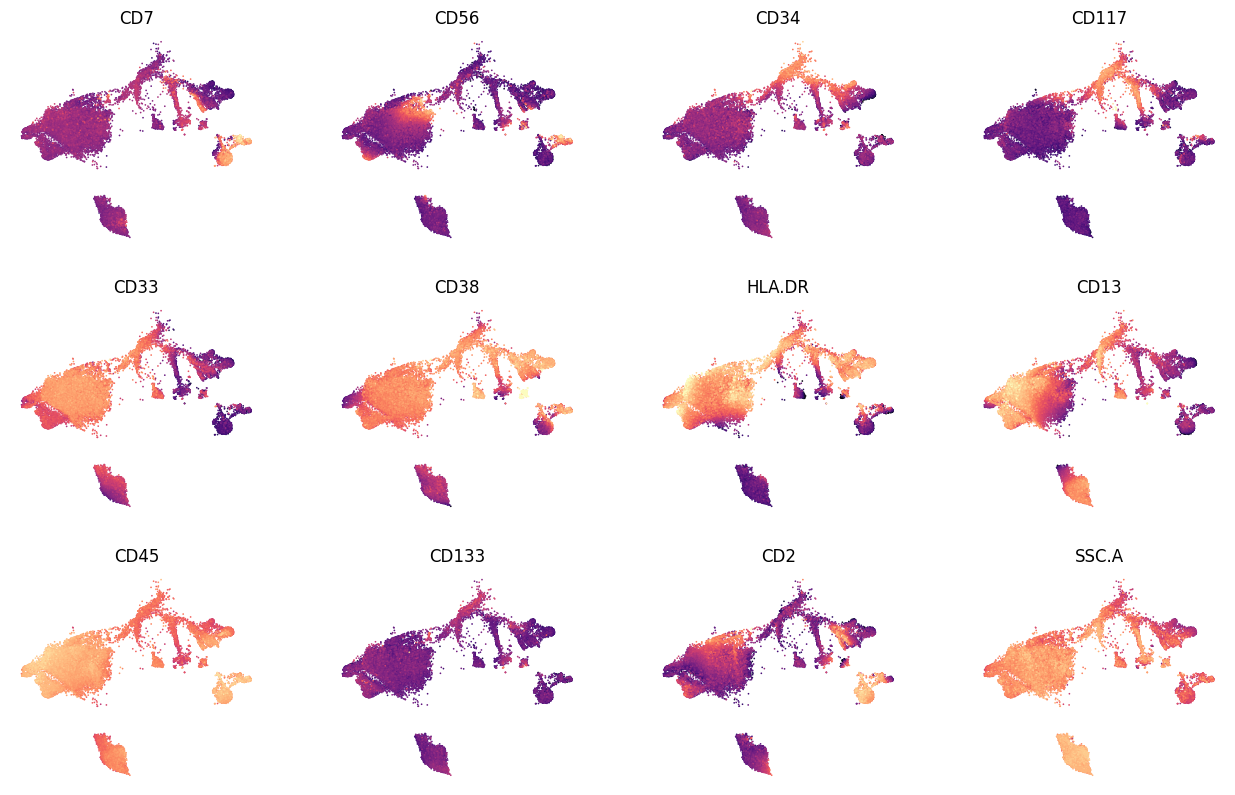

In [10]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(adata_Tube1_N, color=channels,
           palette ='Set2',color_map=mpl.cm.magma,
           frameon = False, colorbar_loc=None,
           size = .5, s = 6, ncols = 4, vmin = -0.2, vmax = 4)

To keep the plot style consistent, try using R for plotting

In [11]:
# Create dataframe
df_exprs_tube1 = pd.DataFrame(adata_Tube1.obsm['transformed'], columns =  adata_Tube1.var_names.values)
df_umap = pd.DataFrame( adata_Tube1.obsm['X_umap'], columns = ["UMAP_1","UMAP_2"] )
df_labels  = pd.DataFrame( { 'Class': adata_Tube1.obs['Class'].values,
                             'Label': adata_Tube1.obs['Label'].values,
                             'Blast.Type': adata_Tube1.obs['Blast.Type'].values,
                             'New.Category': adata_Tube1.obs['New.Category'].values
                             } )
df_Tube1 = pd.concat([df_exprs_tube1, df_umap, df_labels], axis=1)

In [12]:
with localconverter(ro.default_converter + pandas2ri.converter):
  dfr_1 = ro.conversion.py2rpy(df_Tube1)
globalenv['dfr_1'] = dfr_1


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Normalized the MFI for better visualization

In [13]:
%%R
channels_T1 <- c("CD7", "CD56", "CD34", "CD117", "CD33", "CD38", "HLA.DR",
                             "CD13", "CD45", "CD133", "CD2",'SSC.A')
dfr_1[, channels_T1] <-apply(dfr_1[, channels_T1], 2,
                                  function(x) {q <- quantile(x, c(0.001,0.995))
                                        x[x>=q[2]] <- q[2]
                                        x[x<=q[1]] <- q[1]
                                        x
  } )
#Rescale
dfr_1[,channels_T1 ] <- as.data.frame( apply(dfr_1[,channels_T1 ], 2, scales::rescale))
head(dfr_1)

        CD7      CD56      CD34     CD117      CD33      CD38    HLA.DR
0 0.2858065 0.3058110 0.9261721 0.8069763 0.6620069 0.3840816 0.2949887
1 0.9021505 0.3081435 0.8916922 0.7985966 0.5957462 0.6778434 0.3320105
2 0.7072298 0.2555446 0.7205455 0.6179559 0.7407735 0.6295637 0.5674223
3 0.7434050 0.3977645 0.4048226 0.6821790 0.5044042 0.6003902 0.4555899
4 0.2076611 0.2420252 0.8526493 0.5353261 0.4423478 0.2000525 0.6548242
5 0.2864052 0.1766926 0.3481016 0.2131127 0.8409150 0.7293161 0.7226814
       CD13      CD45     CD133       CD2     SSC.A     UMAP_1    UMAP_2 Class
0 0.6642354 0.2735120 0.5515990 0.5173876 0.3977184  5.0648794 15.962259 Blast
1 0.6055685 0.4794939 0.7537998 0.5558340 0.4023132  7.2746396 13.903571 Blast
2 0.6348089 0.5835384 0.5983957 0.3893969 0.4792901  5.5235367 12.593794 Blast
3 0.5830475 0.6103954 0.4501299 0.4344367 0.8900460  7.5143871 10.316204 Blast
4 0.6981521 0.3439353 0.4750249 0.4799294 0.3305726  5.4876900 16.994715 Blast
5 0.4163579 0.6998908 

### Figure 2A

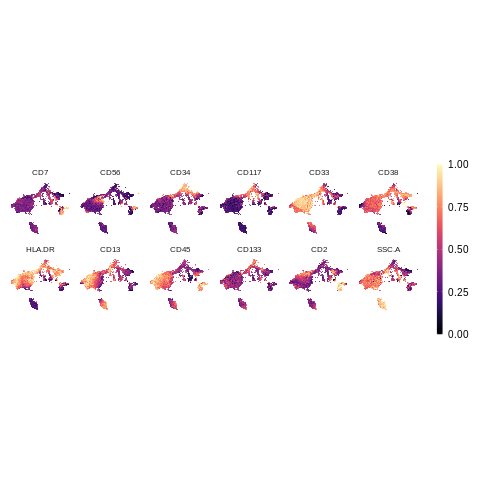

In [14]:
%%R
library(ggplot2)
library(viridis)

head(dfr_1)
dfr_1$Label <- as.character(dfr_1$Label)
dfr_1_N <- dfr_1[ dfr_1$Class == "Normal",]
set.seed(23)
dfr_N_20k <- dfr_1_N[sample(nrow(dfr_1_N), 20000),]

df_melt <- reshape2::melt(dfr_N_20k,
                measure.vars = c(1:length(channels_T1)),
                variable.name = "MARKER",
                value.name = "MFI")
head(df_melt)




p <- ggplot(df_melt, aes(x=UMAP_1,y=UMAP_2, color = MFI)) +
     #geom_density2d(data = df_Norm_DR_UMAP_rLN[,c("UMAP1","UMAP2")]
      #                     ,aes(x=UMAP2,y=UMAP1), color='black',size = 1, h=1)+
     geom_point(size=0.05 , alpha = 0.8,shape=16) +
     facet_wrap(~MARKER, ncol=6)+
     scale_colour_gradientn(colors=viridis::magma(30)
                         #limits = c(0,4.503)#, breaks = c(-1,-0.5,0,0.5,1)
                          #labels = c('-1(B)', '-0.5', '0', '0.5', '1(A)')
                          )+
     #xlim(-8,6)+ylim(-8,16) +
     theme_bw() + coord_fixed()+
      #labs(fill = "Entropy\nscore")+ #x = "TY [°C]", y = "Txxx",
     #guides(color=FALSE, size=FALSE)+
     theme(#legend.position="bottom",
      legend.title = element_blank(),
      legend.text = element_text(size = 10), # legend text size
      legend.key.height = grid::unit(1.2,"cm"),
      legend.key.width = grid::unit(0.2,"cm"),
      #legend.text = element_text(size = 15), # legend text size
      #legend.position = "right",

      panel.grid.major = element_blank(),#element_line(colour = NA), #"grey92"),
      panel.grid.minor = element_blank(),#element_line(colour = NA), #"grey92"
      panel.background = element_blank(),
      panel.border = element_blank(),

      strip.text = element_text(size = 8),
      strip.background = element_blank(),#element_rect(fill = NA,  colour = NA)

      axis.title=element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()

      )

print(p)

ggsave("drive/MyDrive/Documents/manuscripts/plots/normal_expression.png", width = 9, height = 3)


### Figure 2B

Calculate the centroids of blast populations

In [15]:
%%R
dfr_blast <- dfr_1[ dfr_1$Class == "Blast",]
dfr_blast_centroid <- lapply(split(dfr_blast, dfr_blast$Label), function(x) {
    mfi <- apply(x[, c("CD7", "CD56", "CD34", "CD117", "CD33", "CD38", "HLA.DR",
                             "CD13", "CD45", "CD133", "CD2",'SSC.A', "UMAP_1", "UMAP_2")],
                  2, median)

    label <- c(`Class` = as.character(x[1, "Class"]),
                  `Label` = as.character(x[1, "Label"]),
             `Blast.Type` =as.character(x[1, "Blast.Type"]) ,
             `New.Category` = as.character(x[1, "New.Category"]))
    return(list(mfi,label))
})

dfr_blast_mfi <- as.data.frame(do.call(rbind, lapply(dfr_blast_centroid, "[[", 1)))
dfr_blast_label <- do.call(rbind, lapply(dfr_blast_centroid, "[[", 2))
dfr_blast_centroid <- cbind(dfr_blast_mfi, dfr_blast_label)
dfr_blast_centroid

                       CD7      CD56      CD34     CD117      CD33      CD38
201208WJ_LAIP1   0.3944479 0.2435166 0.8684276 0.8670033 0.5789397 0.7006737
201215TDHB_LAIP1 0.3661715 0.2600457 0.8161994 0.6831927 0.7296830 0.6195922
201215TDHB_LAIP2 0.3687022 0.3753316 0.5900336 0.2732366 0.7113098 0.7119214
201227CD_LAIP1   0.3397371 0.2006856 0.4339832 0.8622264 0.2313675 0.3960498
201227ZMA_LAIP1  0.6378939 0.2476220 0.6792578 0.9154224 0.7816070 0.7596685
201227ZMA_LAIP2  0.3769039 0.2513110 0.3164092 0.2564223 0.9009604 0.7249635
210105KW_LAIP1   0.7341556 0.3028244 0.8562887 0.8364566 0.5866332 0.7703338
210106MH_LAIP1   0.3888773 0.3978937 0.4711880 0.7751199 0.8677438 0.6254851
210106NB_LAIP1   0.4083890 0.2196151 0.8916885 0.8328318 0.4807327 0.5484296
210112LJ_LAIP1   0.1234157 0.1179431 0.8065638 0.7151884 0.8134956 0.1488249
210114DE_LAIP1   0.5671979 0.3865517 0.9128820 0.6974378 0.5562661 0.2024381
210114KK_LAIP1   0.7719906 0.2014032 0.7725619 0.7841452 0.6203360 0.7733237

In [16]:
%%R
head(dfr_plot)

  object 'dfr_plot' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'dfr_plot' not found


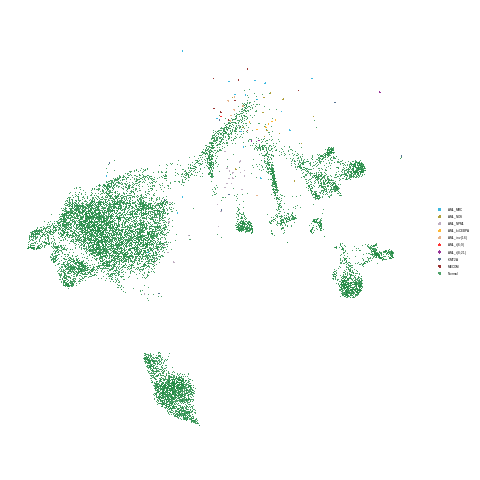

In [18]:
%%R
Assigned_colors = c(
    "AML_MRC"= "#0AA6D8",
    "AML_NOS"= "#9B870C",
    "AML_NPM1"= "#AF9AB2",
    "AML_biCEBPA"= "#FFA500",
    "AML_inv(16)"= "#DFA06E",
    "AML_t(8;21)"= "#800080",
    "AML_t(6;9)"= "#ff0000",
    "KMT2A"= "#2E5077",
    "MECOM"= "#800000",
    "Normal"= "#238B45"
)


dfr_plot <- rbind(dfr_N_20k,dfr_blast_centroid)
dfr_plot$facet <- "Centroid"

p <- ggplot(dfr_plot, aes_string("UMAP_1","UMAP_2" ))+
  theme(aspect.ratio=1,
        panel.background = element_blank(),
        legend.key = element_rect(colour = NA, fill = NA))+
        #xlim(-12, 20) + ylim(0, 20) +
  #facet_wrap(~ "facet", ncol=6)+
  geom_point(aes_string(fill = 'New.Category', size = "Class"),
             shape=21, stroke = 0,
             alpha  = 0.8) +
             scale_fill_manual( values = Assigned_colors)+
             guides(fill = guide_legend(override.aes = list(size = 1.5)))+

             scale_size_manual(values = c(0.8,0.2), guide = "none") +
              theme(
      #legend.position="bottom",
      legend.title = element_blank(),
      legend.text = element_text(size = 3), # legend text size
      #legend.spacing.x = unit(0.002, 'cm'),
      legend.key.height = grid::unit(0.25,"cm"),
      legend.key.width = grid::unit(0.2,"cm"),
      #legend.text = element_text(size = 15), # legend text size
      #legend.position = "right",

      panel.grid.major = element_blank(),#element_line(colour = NA), #"grey92"),
      panel.grid.minor = element_blank(),#element_line(colour = NA), #"grey92"
      panel.background = element_blank(),
      panel.border = element_blank(),

      #strip.text = element_text(size = 8),
      strip.background = element_blank(),#element_rect(fill = NA,  colour = NA)

      axis.title=element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()

      )

ggsave("drive/MyDrive/Documents/manuscripts/plots/centroid.png", width = 5, height = 1.5)

p

In [92]:
%%R
head(df_melt)
unique(df_melt$Blast.Type)

[1] Normal  CD34pos Promono CD34neg
Levels: CD34neg CD34pos Normal Promono


In [110]:
%%R
head(df_melt)
df_melt[df_melt$Class == "Normal","MFI"] <- -1

      UMAP_1    UMAP_2  Class            Label Blast.Type New.Category MARKER
1 -4.0326128  8.023204 Normal VH23-1988_normal     Normal       Normal    CD7
2 13.3691635  4.516658 Normal  210506GM_normal     Normal       Normal    CD7
3 -0.8138500  7.902427 Normal  VH22-640_normal     Normal       Normal    CD7
4  0.2318845 11.171608 Normal  VH21-972_normal     Normal       Normal    CD7
5 13.0021553  3.297335 Normal VH22-1412_normal     Normal       Normal    CD7
6 13.9968958  2.285623 Normal  210303TB_normal     Normal       Normal    CD7
        MFI
1 0.4442565
2 0.8912914
3 0.2526493
4 0.4889049
5 0.7407281
6 0.8015493


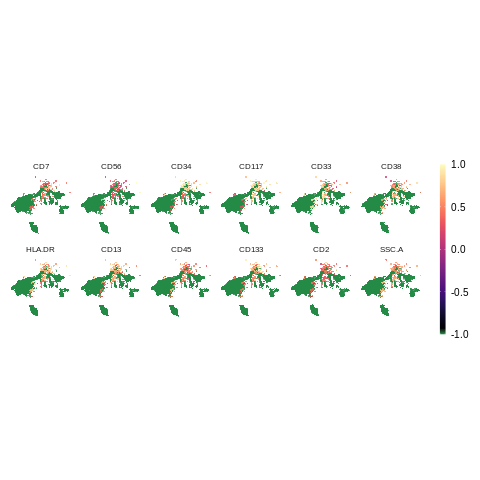

In [153]:
%%R

df_melt <- reshape2::melt(rbind(dfr_N_20k, dfr_blast_centroid),
                measure.vars = c(1:length(channels_T1)),
                variable.name = "MARKER",
                value.name = "MFI")
head(df_melt)
df_melt[df_melt$Class == "Normal","MFI"] <- -1



p <- ggplot(df_melt, aes(x=UMAP_1,y=UMAP_2)) +
     #geom_density2d(data = df_Norm_DR_UMAP_rLN[,c("UMAP1","UMAP2")]
      #                     ,aes(x=UMAP2,y=UMAP1), color='black',size = 1, h=1)+
      geom_point(aes_string( color = "MFI", size = "Class"),
             shape=16, stroke = 0,
             alpha  = 0.8)+
     scale_size_manual(values = c( 0.8, 0.2), guide = "none") +
     facet_wrap(~ MARKER, ncol=6)+
     scale_colour_gradientn(colors=c("#238B45", viridis::magma(30))
                         #limits = c(0,4.503)#, breaks = c(-1,-0.5,0,0.5,1)
                          #labels = c('-1(B)', '-0.5', '0', '0.5', '1(A)')
                          )+
     #xlim(-8,6)+ylim(-8,16) +
     theme_bw() + coord_fixed()+
      #labs(fill = "Entropy\nscore")+ #x = "TY [°C]", y = "Txxx",
     #guides(color=FALSE, size=FALSE)+
     theme(#legend.position="bottom",
      legend.title = element_blank(),
      legend.text = element_text(size = 10), # legend text size
      legend.key.height = grid::unit(1.2,"cm"),
      legend.key.width = grid::unit(0.2,"cm"),
      #legend.text = element_text(size = 15), # legend text size
      #legend.position = "right",

      panel.grid.major = element_blank(),#element_line(colour = NA), #"grey92"),
      panel.grid.minor = element_blank(),#element_line(colour = NA), #"grey92"
      panel.background = element_blank(),
      panel.border = element_blank(),

      strip.text = element_text(size = 8),
      strip.background = element_blank(),#element_rect(fill = NA,  colour = NA)

      axis.title=element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()

      )

print(p)

ggsave("drive/MyDrive/Documents/manuscripts/plots/blast_expression.png", width = 9, height = 3)
